In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv('phishing_email.csv')
df

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0
...,...,...
82481,info advantageapartmentscom infoadvantageapart...,1
82482,monkeyorg helpdeskmonkeyorg monkeyorg hi josep...,1
82483,help center infohelpcentercoza_infohelpcenterc...,1
82484,metamask infosofamekarcom verify metamask wall...,1


In [3]:
# Basic statistics
print("Number of records:", len(df))
print("Distribution of labels:", df['label'].value_counts())

Number of records: 82486
Distribution of labels: 1    42891
0    39595
Name: label, dtype: int64


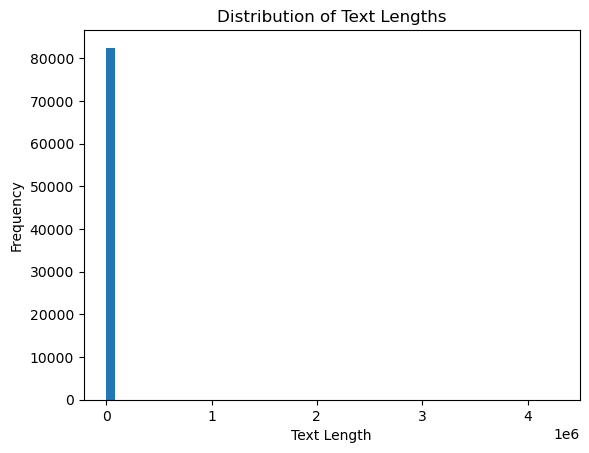

In [4]:
# Text length analysis
df['text_length'] = df['text_combined'].apply(len)
plt.hist(df['text_length'], bins=50)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

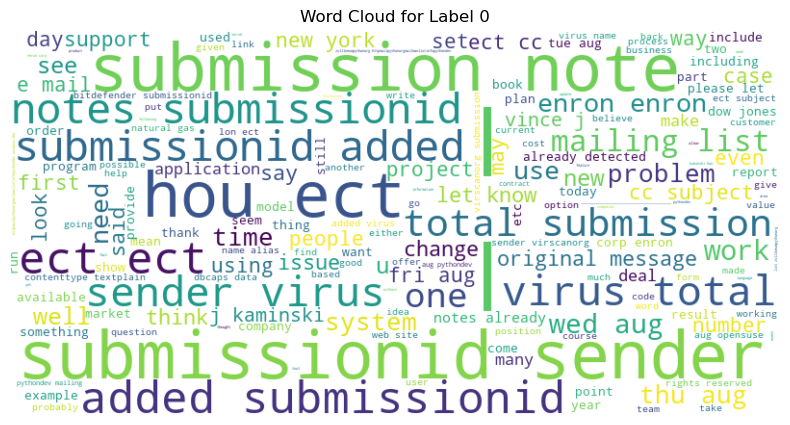

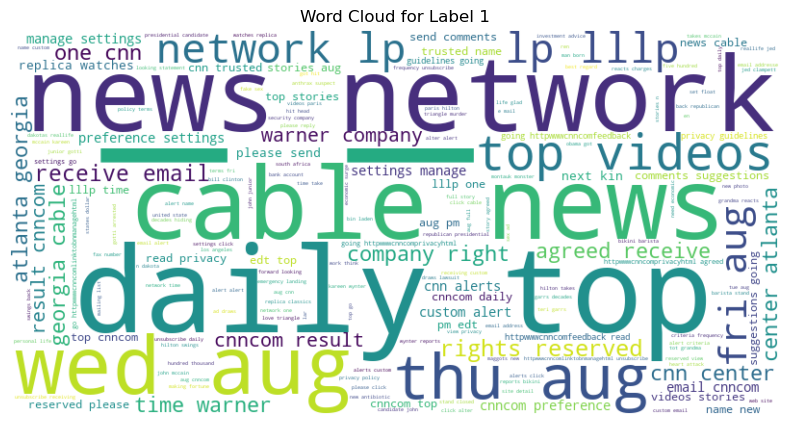

In [5]:
# Word cloud for each label
for label in df['label'].unique():
    text = " ".join(df[df['label'] == label]['text_combined'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label {label}')
    plt.show()

In [6]:
# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [7]:
# Set aside 10% of the data for final evaluation
X_train_full, X_final_test, y_train_full, y_final_test = train_test_split(df['text_combined'], df['label'], test_size=0.1, random_state=42)

In [8]:
# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [9]:
# Convert text data to numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_final_test_tfidf = tfidf_vectorizer.transform(X_final_test)

In [10]:
# Train a Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42)

In [11]:
# Generate accuracy metrics for the training data
y_train_pred = lr_classifier.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print("Training Data Evaluation:")
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.9871
Training Data Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     28446
           1       0.98      0.99      0.99     30943

    accuracy                           0.99     59389
   macro avg       0.99      0.99      0.99     59389
weighted avg       0.99      0.99      0.99     59389



In [12]:
# Evaluate the model on the validation set
y_val_pred = lr_classifier.predict(X_val_tfidf)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')
print("Validation Data Evaluation:")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9830
Validation Data Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7203
           1       0.98      0.99      0.98      7645

    accuracy                           0.98     14848
   macro avg       0.98      0.98      0.98     14848
weighted avg       0.98      0.98      0.98     14848



In [13]:
# Evaluate the model on the final held-out test set
y_final_test_pred = lr_classifier.predict(X_final_test_tfidf)
final_test_accuracy = accuracy_score(y_final_test, y_final_test_pred)
print(f'Final Test Accuracy: {final_test_accuracy:.4f}')
print("Final Test Data Evaluation:")
print(classification_report(y_final_test, y_final_test_pred))

Final Test Accuracy: 0.9833
Final Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3946
           1       0.98      0.99      0.98      4303

    accuracy                           0.98      8249
   macro avg       0.98      0.98      0.98      8249
weighted avg       0.98      0.98      0.98      8249

